In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [4]:
control_df = df.query('group == "control"')

In [5]:
control_df.head()

,timestamp,id,group,total_days,completed
1,2015-08-10 17:15:28.950975,690224,control,75,False
5,2015-08-10 19:58:07.004051,763661,control,55,False
6,2015-08-10 20:10:42.230941,634832,control,97,False
7,2015-08-10 20:29:33.099757,849686,control,97,False
10,2015-08-11 00:45:37.012714,286646,control,50,False


In [6]:
print(df.shape[0],len(df.id.value_counts()))

3829 3829


In [8]:
# Create dataframe with all control records
control_df = df.query('group == "control"')

# Compute completion rate
control_ctr = control_df.completed.mean()

# Display completion rate
control_ctr

0.37199519230769229

In [10]:
# Create dataframe with all experiment records
experiment_df = df.query('group == "experiment"')


# Compute completion rate
experiment_ctr = experiment_df.completed.mean()

# Display completion rate
experiment_ctr

0.39353348729792148

In [11]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [12]:
# Create sampling distribution for difference in completion rates
# with boostrapping
size = df.shape[0]
diffs = []
for _ in range(10000):
    b_samp = df.sample(size, replace=True) # bootstrap
    control_mean = b_samp.query('group == "control"').completed.mean()
    experiment_mean = b_samp.query('group == "experiment"').completed.mean()
    diffs.append(experiment_mean - control_mean)


(array([   10.,    85.,   449.,  1353.,  2457.,  2778.,  1837.,   776.,
          223.,    32.]),
 array([-0.0381512 , -0.02679438, -0.01543755, -0.00408072,  0.0072761 ,
         0.01863293,  0.02998976,  0.04134658,  0.05270341,  0.06406024,
         0.07541706]),
 <a list of 10 Patch objects>)

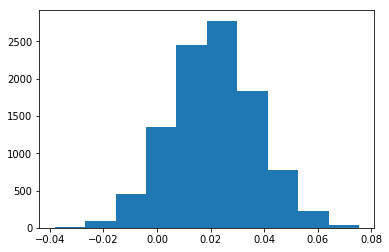

In [13]:
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs)

(array([  4.00000000e+01,   2.84000000e+02,   1.18000000e+03,
          2.49000000e+03,   3.02000000e+03,   2.04700000e+03,
          7.78000000e+02,   1.43000000e+02,   1.70000000e+01,
          1.00000000e+00]),
 array([-0.05339843, -0.04104935, -0.02870027, -0.01635119, -0.00400211,
         0.00834697,  0.02069605,  0.03304513,  0.04539421,  0.05774329,
         0.07009237]),
 <a list of 10 Patch objects>)

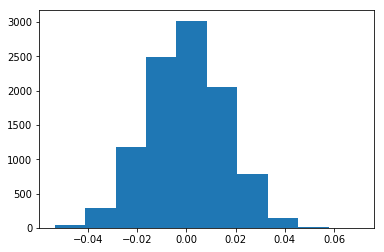

In [14]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), 10000)

# Plot the null distribution
plt.hist(null_vals)

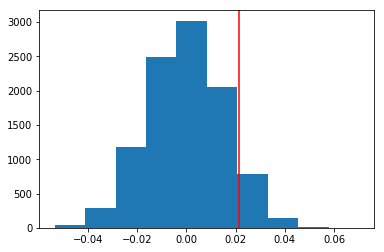

In [15]:
# Plot observed statistic with the null distibution

plt.hist(null_vals)
plt.axvline(x=obs_diff,color='red')


In [16]:
# compute p value
# compute p value
(null_vals>obs_diff).mean()   # not rejecting null, probability is >0.05 of 
# obs diff happened under null assumption

0.084599999999999995